In [10]:
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('Daily_minimum_temps.csv', header=0)
display(df.head(10))

,Date,Temp
0,01/01/81,20.7
1,01/02/81,17.9
2,01/03/81,18.8
3,01/04/81,14.6
4,01/05/81,15.8
5,01/06/81,15.8
6,01/07/81,15.8
7,01/08/81,17.4
8,01/09/81,21.8
9,01/10/81,20.0


In [12]:
df_new = pd.DataFrame(columns = ['x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x'])

dados = df.iloc[:, 1].values
tam = len(dados)

for i in range(tam-10):
  df_new_row = pd.DataFrame({
    'x-10': [dados[i]], 
    'x-9': [dados[i+1]], 
    'x-8': [dados[i+2]], 
    'x-7': [dados[i+3]],
    'x-6': [dados[i+4]], 
    'x-5': [dados[i+5]], 
    'x-4': [dados[i+6]], 
    'x-3': [dados[i+7]],
    'x-2': [dados[i+8]], 
    'x-1': [dados[i+9]],
    'x': [dados[i+10]]
  })
  df_new = pd.concat([df_new, df_new_row], ignore_index=True)
  
y = df_new[['x']]
x = df_new.drop('x', axis=1)

/tmp/ipykernel_137613/3947238711.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_new = pd.concat([df_new, df_new_row], ignore_index=True)


In [13]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=None)
print(y_test)
y_test = y_test.ravel()
print(y_test)


[[0.30038023]
 [0.44106464]
 [0.53231939]
 ...
 [0.50570342]
 [0.30038023]
 [0.35741445]]
[0.30038023 0.44106464 0.53231939 ... 0.50570342 0.30038023 0.35741445]


In [14]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', alpha=0.00001,
                       max_iter=5000, tol=0.00001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       learning_rate_init=0.001, learning_rate='constant')

mlp_reg.fit(x_train, y_train)

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1770: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,hidden_layer_sizes,50
,activation,'relu'
,solver,'adam'
,alpha,1e-05
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,5000
,shuffle,True


,Desejado,Estimado
0,0.300380,0.242118
1,0.441065,0.507088
2,0.532319,0.432771
3,0.376426,0.359277
4,0.418251,0.339293
5,0.136882,0.297756
6,0.441065,0.440096
7,0.235741,0.339832
8,0.403042,0.284608
9,0.441065,0.500036


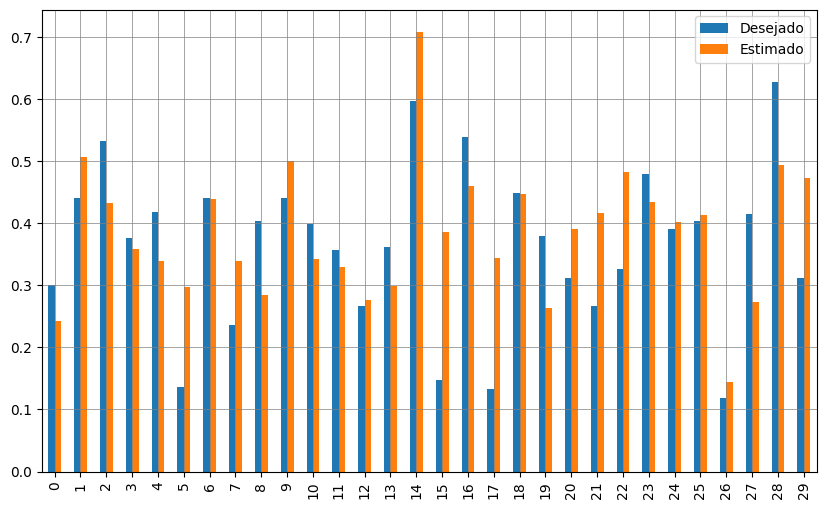

In [15]:
y_predict = mlp_reg.predict(x_test)

df_temp = pd.DataFrame({'Desejado': y_test, 'Estimado': y_predict})
display(df_temp.head(15))
df_temp = df_temp.head(30)
df_temp.plot(kind='bar', figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.show()

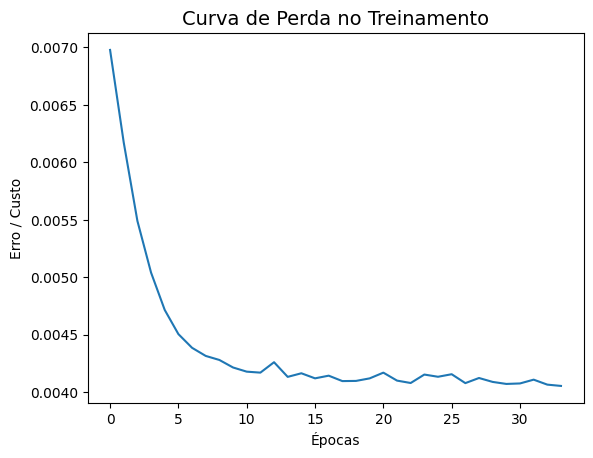

In [16]:
plt.plot(mlp_reg.loss_curve_)
plt.title('Curva de Perda no Treinamento', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Erro / Custo')
plt.show()

In [17]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Square Error (MSE): ', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_test, y_predict))
print('R2 Score: ', metrics.r2_score(y_test, y_predict))

Epochs:  34
Loss:  0.004054404780972327
Mean Absolute Error (MAE):  0.07475427369294743
Mean Square Error (MSE):  0.009189238376759588
Root Mean Squared Error (RMSE):  0.009189238376759588
R2 Score:  0.6362661371152705


{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 150, 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'tol': 1e-08}


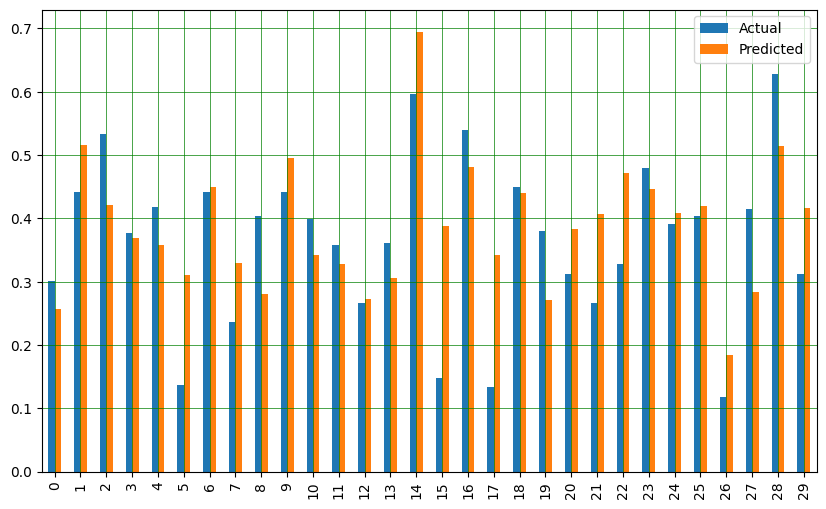

Epochs:  131
Loss:  0.004612512757040807
Mean Absolute Error (MAE):  0.0736169061625901
Mean Square Error (MSE):  0.008937520704059686
Root Mean Squared Error (RMSE):  0.008937520704059686
R2 Score:  0.6462297747633098
Best Score:  0.638467304371124


In [18]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'hidden_layer_sizes': [(50), (100), (150)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.01, 0.0001],
    'tol': [1e-8, 1e-4],
    'alpha': [0.01, 0.001],
    'learning_rate': ['constant','adaptive'],
}

mlp_reg_grid = MLPRegressor(solver='adam', alpha=1e-2, max_iter=5000, early_stopping=True, epsilon=1e-8, random_state=None)

grid = GridSearchCV(mlp_reg_grid, grid_params, cv=5)
grid.fit(x, y.ravel())

print(grid.best_params_)

grid_predictions = grid.predict(x_test)
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_temp2.head()

df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Epochs: ', grid.best_estimator_.n_iter_)
print('Loss: ', grid.best_estimator_.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, grid_predictions))
print('Mean Square Error (MSE): ', metrics.mean_squared_error(y_test, grid_predictions))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_test, grid_predictions))
print('R2 Score: ', metrics.r2_score(y_test, grid_predictions))

print("Best Score: ", grid.best_score_)
